# Data Cleaning, Preparation, and Visualization

## Data Cleaning and Preparation using Pandas





### Identifying and Handling Missing Data


In [1]:
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


<ipython-input-1-77fe8e405040>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-1-77fe8e405040>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Standardizing Categorical Data

In [2]:
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


In [3]:
import pandas as pd

# Create a new sample dataset
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Apple', None, 'Banana', 'Grape'],
    'Quantity': [10, None, 5, 10, 8, 6, None],
    'Color': ['Red', 'Yellow', 'Orange', 'Red', 'yellow', 'yellow', 'Purple']
}
df = pd.DataFrame(data)

# Identify missing values
print("Initial DataFrame with missing values:")
print(df)
print("\nMissing values in each column:")
print(df.isnull().sum())

# Normalize numerical columns
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
df['Quantity'] = (df['Quantity'] - df['Quantity'].min()) / (df['Quantity'].max() - df['Quantity'].min())

# Standardize categorical columns
df['Fruit'] = df['Fruit'].str.lower().str.capitalize()
df['Color'] = df['Color'].str.capitalize()

# Remove duplicates based on 'Fruit' and 'Color'
df.drop_duplicates(subset=['Fruit', 'Color'], inplace=True)

# Remove rows with None in 'Fruit' after cleaning
df.dropna(subset=['Fruit'], inplace=True)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df)



Initial DataFrame with missing values:
    Fruit  Quantity   Color
0   Apple      10.0     Red
1  Banana       NaN  Yellow
2  Orange       5.0  Orange
3   Apple      10.0     Red
4    None       8.0  yellow
5  Banana       6.0  yellow
6   Grape       NaN  Purple

Missing values in each column:
Fruit       1
Quantity    2
Color       0
dtype: int64

Cleaned DataFrame:
    Fruit  Quantity   Color
0   Apple      1.00     Red
1  Banana      0.56  Yellow
2  Orange      0.00  Orange
6   Grape      0.56  Purple


<ipython-input-3-c73dbdaadcda>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)


### Homework
- Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.



In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the Data
file_path = '/content/titanic.csv'
data = pd.read_csv(file_path)

# Inspect the Data
print("First five rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handle Missing Values
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())

# Normalize Numerical Features
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Encode Categorical Variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Handle Outliers
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Final Dataset Preparation
# Dropping irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Split the Dataset into Features and Target Variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFinal cleaned dataset:")
print(data.head())
print("\nShapes of training and testing sets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

First five rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

<ipython-input-4-d182f3a36ed7>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-4-d182f3a36ed7>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

## Data Visualization using Matplotlib and Seaborn

### Basic Plotting with Matplotlib


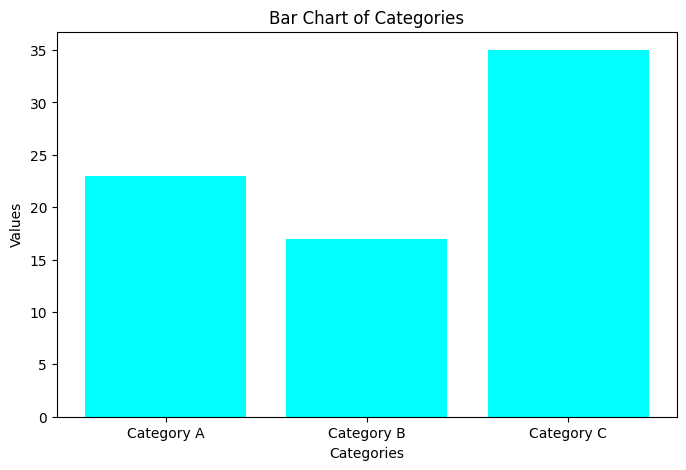

In [5]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


### Seaborn for Relationship Visualization

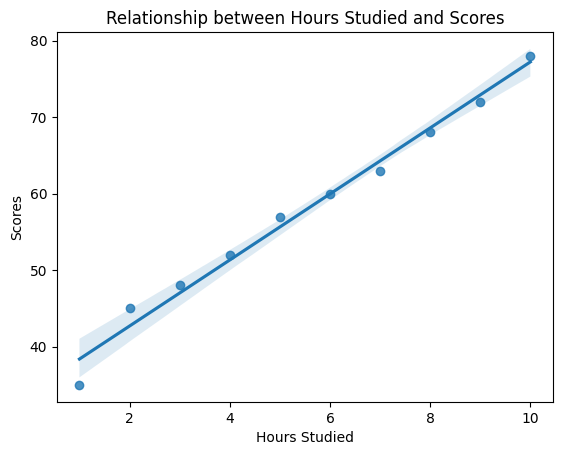

In [7]:
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


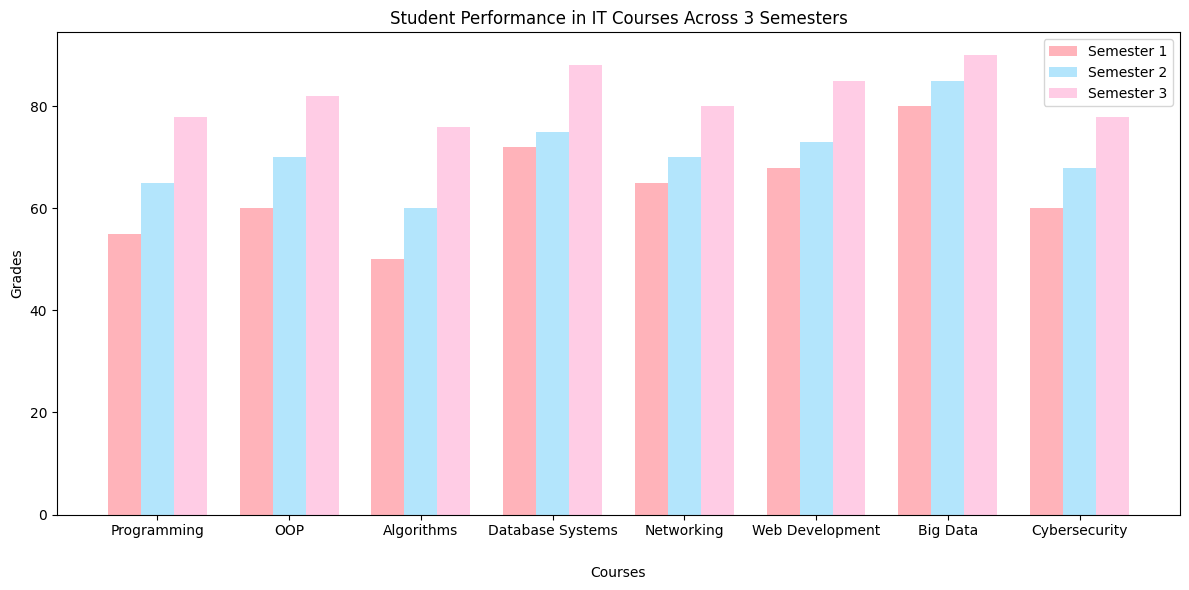

In [8]:
import matplotlib.pyplot as plt
import numpy as np

courses = ['Programming', 'OOP', 'Algorithms', 'Database Systems', 'Networking', 'Web Development',
           'Big Data', 'Cybersecurity']
semester_1 = [55, 60, 50, 72, 65, 68, 80, 60]
semester_2 = [65, 70, 60, 75, 70, 73, 85, 68]
semester_3 = [78, 82, 76, 88, 80, 85, 90, 78]

x = np.arange(len(courses))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, semester_1, width, label='Semester 1', color='#FFB3BA')
plt.bar(x, semester_2, width, label='Semester 2', color='#B3E5FC')
plt.bar(x + width, semester_3, width, label='Semester 3', color='#FFCCE5')

plt.xlabel('Courses', labelpad=20)
plt.ylabel('Grades')
plt.title('Student Performance in IT Courses Across 3 Semesters')
plt.xticks(x, courses, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


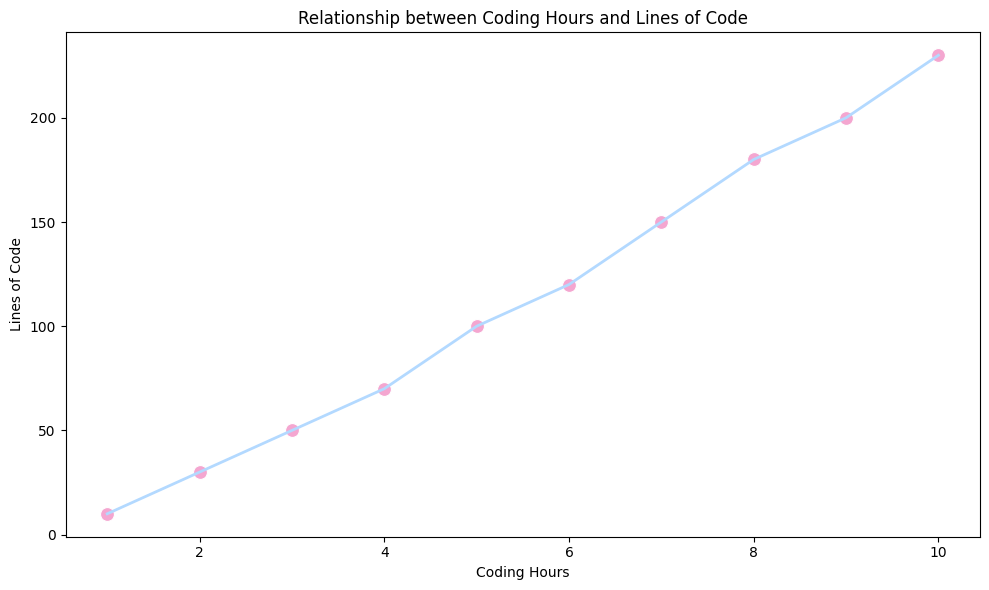

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Coding Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Lines of Code': [10, 30, 50, 70, 100, 120, 150, 180, 200, 230]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Coding Hours', y='Lines of Code', color='#F4A6D0', s=100, data=df)
sns.lineplot(x='Coding Hours', y='Lines of Code', data=df, color='#B3D9FF', linewidth=2)
plt.title('Relationship between Coding Hours and Lines of Code')
plt.xlabel('Coding Hours')
plt.ylabel('Lines of Code')
plt.tight_layout()
plt.show()


### Homework for Students
- Create a dashboard with multiple visualizations to summarize a dataset of your choice.


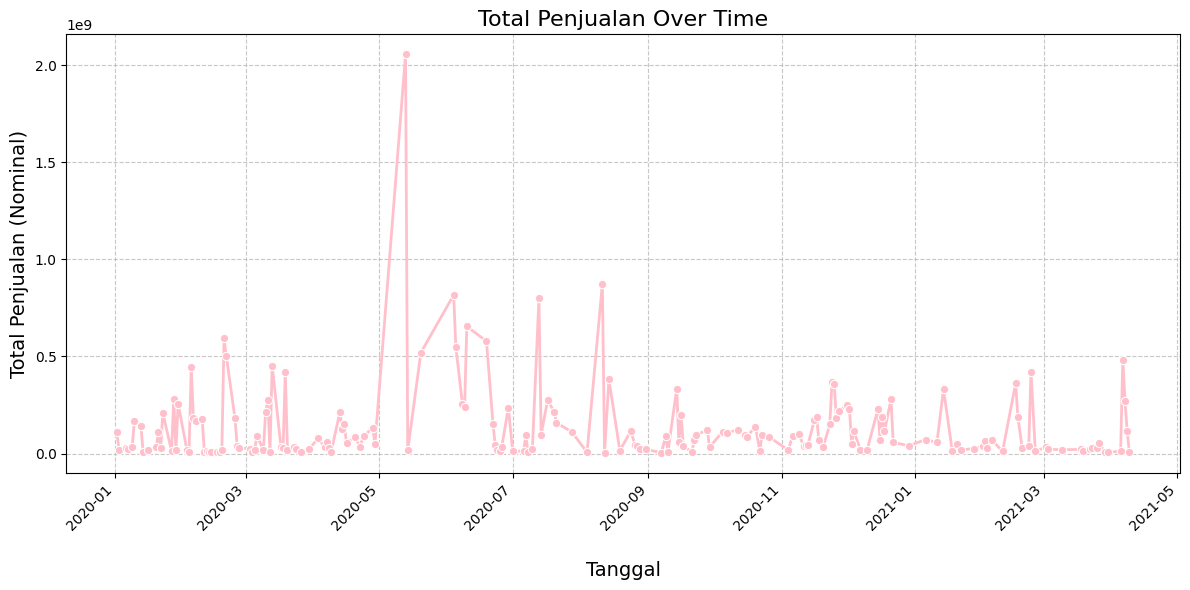

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/penjualan barang.csv'
data = pd.read_csv(file_path)

data['tanggal'] = pd.to_datetime(data['tanggal'])

total_sales_over_time = data.groupby('tanggal')['nominal'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sales_over_time, x='tanggal', y='nominal', color='pink', marker='o', linewidth=2)
plt.title('Total Penjualan Over Time', fontsize=16)
plt.xlabel('Tanggal', fontsize=14, labelpad=20)
plt.ylabel('Total Penjualan (Nominal)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


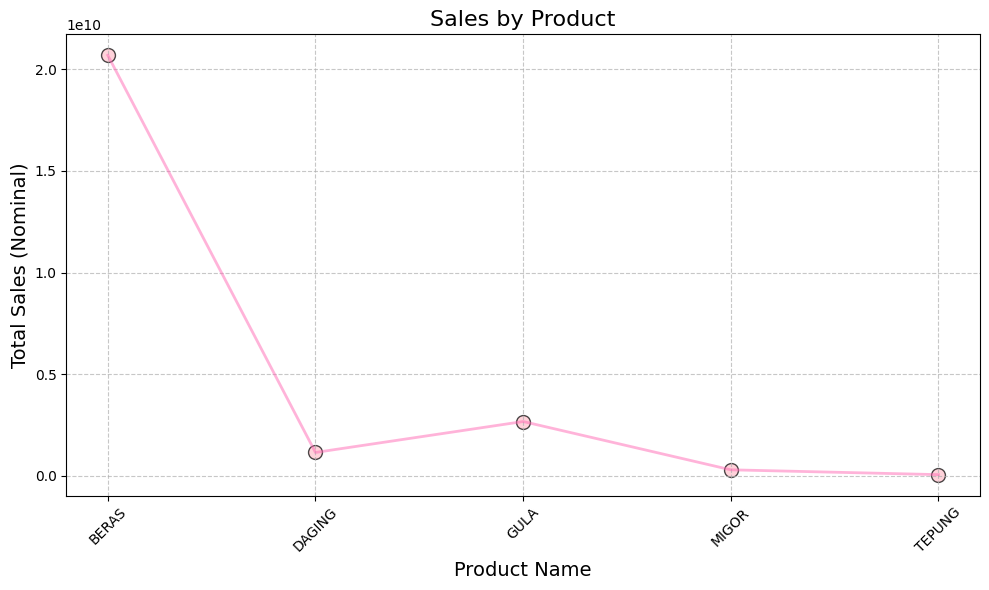

In [11]:
sales_by_product = data.groupby('nama.barang')['nominal'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.scatter(sales_by_product['nama.barang'], sales_by_product['nominal'], color='pink', s=100, alpha=0.7, edgecolors='black')
plt.plot(sales_by_product['nama.barang'], sales_by_product['nominal'], color='hotpink', linestyle='-', linewidth=2, alpha=0.5)

plt.title('Sales by Product', fontsize=16, color='black')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Sales (Nominal)', fontsize=14)

plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

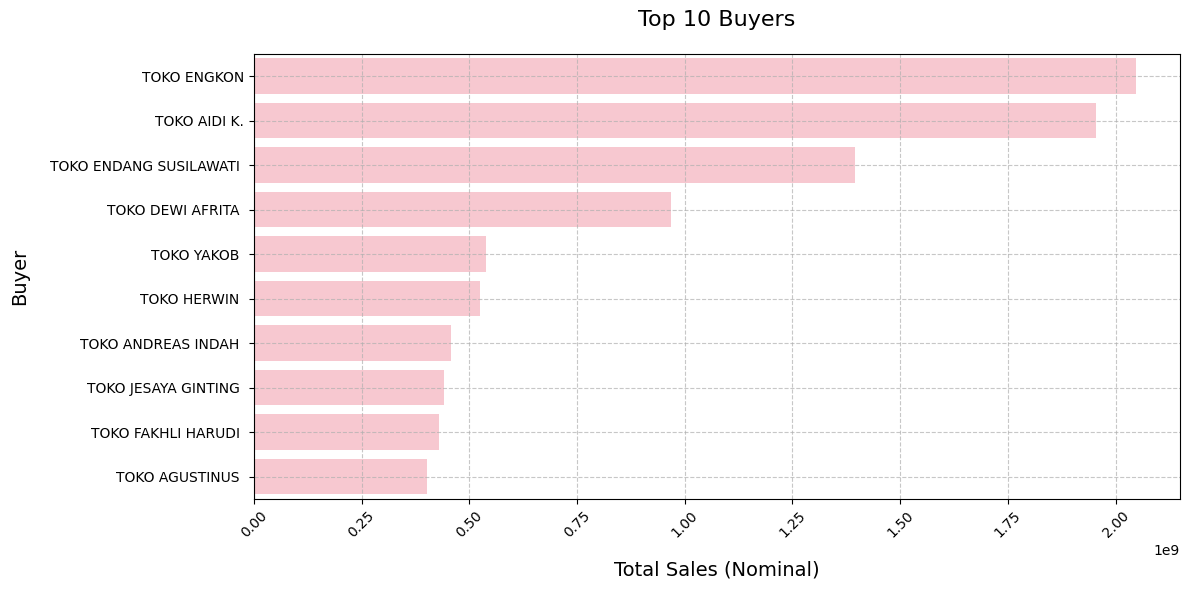

In [12]:
top_buyers = data.groupby('nama.pembeli')['nominal'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_buyers, x='nominal', y='nama.pembeli', color='pink')
plt.title('Top 10 Buyers', fontsize=16, pad=20)
plt.xlabel('Total Sales (Nominal)', fontsize=14, labelpad=15)
plt.ylabel('Buyer', fontsize=14, labelpad=15)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()